In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv("kids_train_cleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2
0,326,1,10/25/2010,ADESA,2008.0,2.0,KIA,SPECTRA,EX,SEDAN,...,10.0,25.0,Monday,4.11398,5.0,0,0,4.0,1797.080405,-753.566708
1,42991,0,5/27/2009,MANHEIM,2006.0,3.0,CHRYSLER,STRATUS,SXT,SEDAN,...,5.0,27.0,Wednesday,2.70000,6.0,0,0,4.0,-4879.356480,1637.798453
2,55273,0,3/18/2010,OTHER,2008.0,2.0,CHRYSLER,CALIBER,SE,WAGON,...,3.0,18.0,Thursday,2.31289,6.0,0,0,4.0,4349.541129,-467.358818
3,29058,0,6/8/2009,OTHER,2005.0,4.0,FORD,FREESTAR,S,MINIVAN,...,6.0,8.0,Monday,3.90000,6.0,NO,Front,5.0,-5514.286888,1633.449461
4,34991,0,3/4/2009,MANHEIM,2005.0,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,...,3.0,4.0,Wednesday,3.30000,4.0,NO,Front,5.0,-4594.389176,1693.004506


In [3]:
for e in df.columns:
    print(e)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2


In [4]:
categories = ['IsBadBuy', 'Auction', 'Make', 'Model', 'Trim', 
            'SubModel', 'Color', 'Transmission', 'Nationality', 'VNST', 'PurchWeekDay']
not_cat = ['VehOdo', 'VehBCost', 'WarrantyCost', 'AAAP', 'VehicleAge']
to_drop = ['AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP', 'CRCP', 'NumCylinders', '4X4', 'WheelDrive',
           'NumDoors', 'PCA1', 'PCA2', 'RefId', 'PurchDate', 'WheelType', 'PurchYear', 'PurchMonth',
            'PurchDay', 'BYRNO', 'VehYear', 'EngineLiters']

In [5]:
df.drop(to_drop, axis=1, inplace=True)

In [6]:
for col in categories:
    df[col] = df[col].astype('category')
    
df['VehicleAge'] = df['VehicleAge'].astype('int')

In [7]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## Binning

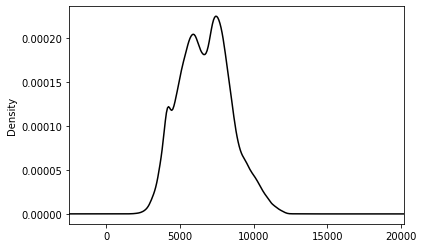

In [8]:
x = plt.xlim((-2500, 20200))
df["VehBCost"].plot.kde(x = 'x', color = 'black') 

In [9]:
bins = [df.VehBCost.min() - 1,5000, 7000, 8000, 10000, df.VehBCost.max()]

df['VehBCost'] = pd.cut(df['VehBCost'], bins)

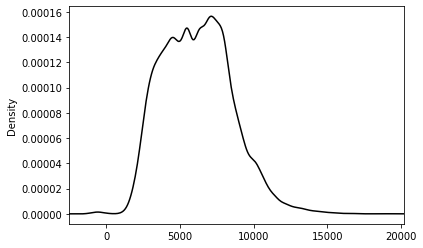

In [10]:
x = plt.xlim((-2500, 20200))
df["AAAP"].plot.kde(x = 'x', color = 'black') 

In [11]:
bins = [df.AAAP.min() - 1, 3000, 6000, 8000, 10000, df.AAAP.max()]

df['AAAP'] = pd.cut(df['AAAP'], bins)

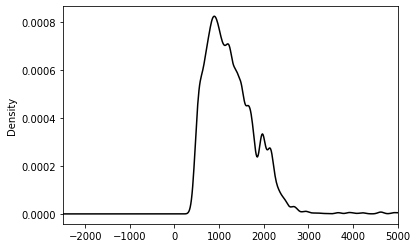

In [12]:
x = plt.xlim((-2500, 5000))
df["WarrantyCost"].plot.kde(x = 'x', color = 'black') 

In [13]:
bins = [df.WarrantyCost.min() - 1,700, 1200, 1800, 2600, df.WarrantyCost.max()]

df['WarrantyCost'] = pd.cut(df['WarrantyCost'], bins)

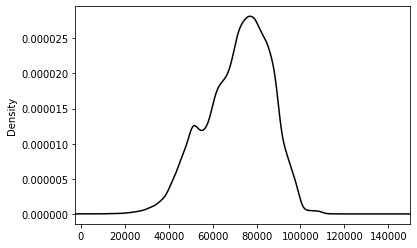

In [14]:
x = plt.xlim((-2500, 150000))
df["VehOdo"].plot.kde(x = 'x', color = 'black') 

In [15]:
bins = [df.VehOdo.min() - 1,40000, 60000, 80000, 100000, df.VehOdo.max()]

df['VehOdo'] = pd.cut(df['VehOdo'], bins)

In [16]:
df['VehicleAge'] = pd.cut(df['VehicleAge'], [0, 2, 4, 6, 8, 10], right=False)

Remapping Values

In [17]:
df.head()

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,Nationality,AAAP,VNST,VehBCost,WarrantyCost,PurchWeekDay
0,1,ADESA,"[2, 4)",KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,"(60000, 80000]",KOREAN,"(6000.0, 8000.0]",FL,"(5000.0, 7000.0]","(461, 700]",Monday
1,0,MANHEIM,"[2, 4)",CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,"(80000, 100000]",AMERICAN,"(3000.0, 6000.0]",FL,"(224.0, 5000.0]","(1200, 1800]",Wednesday
2,0,OTHER,"[2, 4)",CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,"(40000, 60000]",AMERICAN,"(8000.0, 10000.0]",OK,"(7000.0, 8000.0]","(461, 700]",Thursday
3,0,OTHER,"[4, 6)",FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,"(80000, 100000]",AMERICAN,"(3000.0, 6000.0]",AZ,"(224.0, 5000.0]","(1200, 1800]",Monday
4,0,MANHEIM,"[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,"(60000, 80000]",AMERICAN,"(3000.0, 6000.0]",TX,"(5000.0, 7000.0]","(1200, 1800]",Wednesday


In [18]:
df['VehicleAge'] = 'Age:' + df['VehicleAge'].astype(str)
df['VehOdo'] = 'Odo:' + df['VehOdo'].astype(str)
df['AAAP'] = 'AAAP:' + df['AAAP'].astype(str)
df['WarrantyCost'] = 'WarrCost:' + df['WarrantyCost'].astype(str)
df['VehBCost'] = 'VehBCost:' + df['VehBCost'].astype(str)

df['BuyStatus'] = df['IsBadBuy'].map(
    {0: 'GoodBuy', 1: 'BadBuy'}).astype(str)
df.drop(columns=['IsBadBuy'], inplace=True)

In [19]:
df.head()

,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,Nationality,AAAP,VNST,VehBCost,WarrantyCost,PurchWeekDay,BuyStatus
0,ADESA,"Age:[2, 4)",KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,"Odo:(60000, 80000]",KOREAN,"AAAP:(6000.0, 8000.0]",FL,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]",Monday,BadBuy
1,MANHEIM,"Age:[2, 4)",CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Wednesday,GoodBuy
2,OTHER,"Age:[2, 4)",CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,"Odo:(40000, 60000]",AMERICAN,"AAAP:(8000.0, 10000.0]",OK,"VehBCost:(7000.0, 8000.0]","WarrCost:(461, 700]",Thursday,GoodBuy
3,OTHER,"Age:[4, 6)",FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,"Odo:(80000, 100000]",AMERICAN,"AAAP:(3000.0, 6000.0]",AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Monday,GoodBuy
4,MANHEIM,"Age:[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,"Odo:(60000, 80000]",AMERICAN,"AAAP:(3000.0, 6000.0]",TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(1200, 1800]",Wednesday,GoodBuy


In [20]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## APRIORI